In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

In [12]:
# reading in the data and filling in nulls
print(os.getcwd())
print(os.listdir())
jackson = pd.read_csv("jackson_processed.csv")
joseph = pd.read_csv("joseph_processed.csv")
spencer = pd.read_csv("spencer_processed.csv")

joseph = joseph.rename(columns={joseph.columns[0]: "calendarDate"})
spencer = spencer.rename(columns={spencer.columns[0]: "calendarDate"})

jackson = jackson.fillna(0)
spencer = spencer.fillna(0)
joseph = joseph.fillna(0)

step_one = pd.concat([jackson,joseph])
full_df = pd.concat([step_one,spencer])
final = full_df.reset_index().fillna(0)

/Users/jacksonmiskill/class/s25/public-health/project3/Project
['intake.py', 'intake_verbose.py', 'prediction.ipynb', '.DS_Store', 'jackson_processed.csv', 'distribution_comparison.png', 'joseph_processed.csv', 'README.md', 'joseph-data-dev', 'spencer_processed.csv', '.gitignore', 'stats.py', 'jackson-data-dev', '.git', 'stats_verbose.py', 'data']


In [13]:
# implementing random forrest regressor for this 

# jackson


X = jackson.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
y = jackson['llm_stress_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

jackson_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
jackson_rf_model.fit(X_train, y_train)

y_pred = jackson_rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Jackson RF MAE: {mae:.3f}")
print(f"Jackson RF MSE: {mse:.3f}")
print(f"Jackson RF RMSE: {rmse:.3f}")
print(f"Jackson RF R² Score: {r2:.3f}")




Jackson RF MAE: 0.950
Jackson RF MSE: 1.428
Jackson RF RMSE: 1.195
Jackson RF R² Score: 0.401


In [36]:
# joseph RF

X = joseph.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
y = joseph['llm_stress_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

joseph_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
joseph_rf_model.fit(X_train, y_train)

y_pred = joseph_rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Joseph RF MAE: {mae:.3f}")
print(f"Joseph RF MSE: {mse:.3f}")
print(f"Joseph RF RMSE: {rmse:.3f}")
print(f"Joseph RF R² Score: {r2:.3f}")

Joseph RF MAE: 1.138
Joseph RF MSE: 2.379
Joseph RF RMSE: 1.542
Joseph RF R² Score: 0.489


In [37]:
# Spencer

X = spencer.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
y = spencer['llm_stress_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

spencer_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
spencer_rf_model.fit(X_train, y_train)

y_pred = spencer_rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"spencer RF MAE: {mae:.3f}")
print(f"spencer RF MSE: {mse:.3f}")
print(f"spencer RF RMSE: {rmse:.3f}")
print(f"spencer RF R² Score: {r2:.3f}")

spencer RF MAE: 0.872
spencer RF MSE: 1.429
spencer RF RMSE: 1.195
spencer RF R² Score: 0.736


In [48]:
# combined, holdout spencer's data



jackson_X = jackson.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
jackson_y = jackson['llm_stress_rating']

joseph_X = joseph.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
joseph_y = joseph['llm_stress_rating']

combined_X_train = pd.concat([jackson_X, joseph_X])
combined_y_train = pd.concat([jackson_y, joseph_y])

combined_X_train = combined_X_train.fillna(0)
combined_y_train = combined_y_train.fillna(0)

X_test = spencer.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
y_test = spencer['llm_stress_rating']
X_test = X_test[combined_X_train.columns]

combined_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
combined_rf_model.fit(combined_X_train, combined_y_train)

y_pred = combined_rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Combined RF MAE: {mae:.3f}")
print(f"Combined RF MSE: {mse:.3f}")
print(f"Combined RF RMSE: {rmse:.3f}")
print(f"Combined RF R² Score: {r2:.3f}")


Combined RF MAE: 1.375
Combined RF MSE: 3.590
Combined RF RMSE: 1.895
Combined RF R² Score: 0.422


In [27]:
# Final
X = final.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
y = final['llm_stress_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf_model.fit(X_train, y_train)

y_pred = final_rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"final RF MAE: {mae:.3f}")
print(f"final RF MSE: {mse:.3f}")
print(f"final RF RMSE: {rmse:.3f}")
print(f"final RF R² Score: {r2:.3f}")

final RF MAE: 1.242
final RF MSE: 2.839
final RF RMSE: 1.685
final RF R² Score: 0.520


/var/folders/_m/1l5g3ybj3tq0zbv9zsff88c00000gn/T/ipykernel_5493/3519231174.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


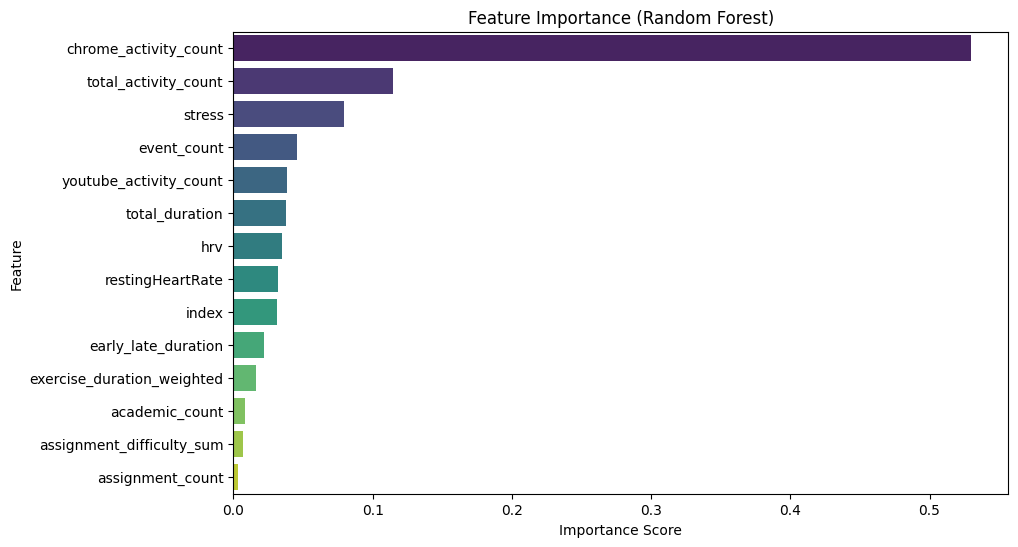

In [28]:
importances = final_rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance,
    palette='viridis',
    orient='h'
)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


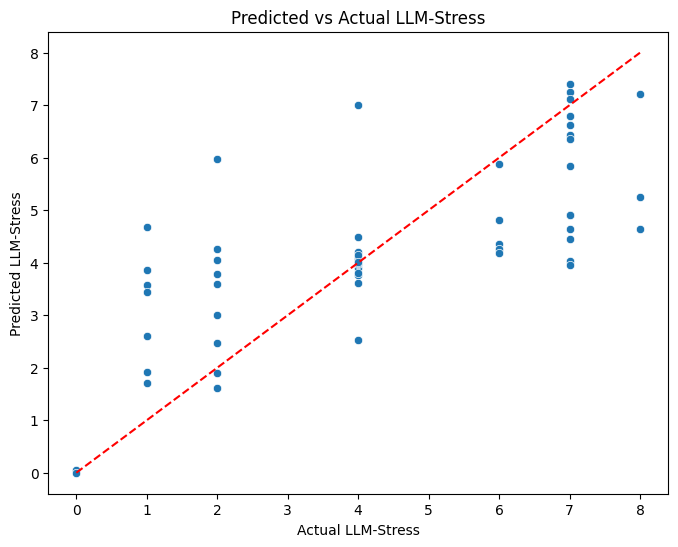

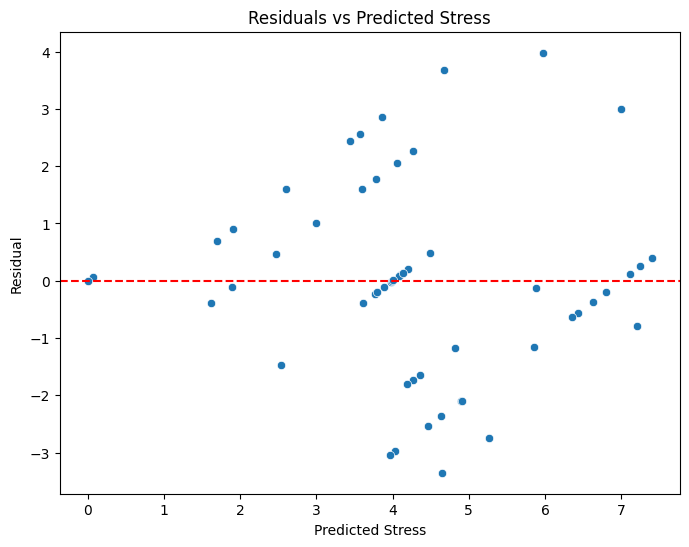

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# y_test = actual stress values
# y_pred = predicted stress values

# 1. Predicted vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual LLM-Stress')
plt.ylabel('Predicted LLM-Stress')
plt.title('Predicted vs Actual LLM-Stress')
plt.show()

# 2. Residuals plot
residuals = y_pred - y_test
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Stress')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Stress')
plt.show()

In [29]:


X = final[['restingHeartRate', 'event_count', 'total_duration',
       'academic_count', 'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating']]
y = final['stress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the final_model
final_model = LinearRegression()

# # Train the final_model
final_model.fit(X_train, y_train)

# # View final_model parameters
print(f"final_Model: y = {final_model.coef_[0]:.2f}x + {final_model.intercept_:.2f}")

# # Make a prediction
y_pred = final_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

print(X_test.columns)


final_Model: y = 0.73x + -2.66
MAE: 9.725508415168319
MSE: 135.1352481771146
RMSE: 11.624768736500291
R² Score: 0.7325452087852562
Index(['restingHeartRate', 'event_count', 'total_duration', 'academic_count',
       'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating'],
      dtype='object')


/var/folders/_m/1l5g3ybj3tq0zbv9zsff88c00000gn/T/ipykernel_5493/3936115205.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


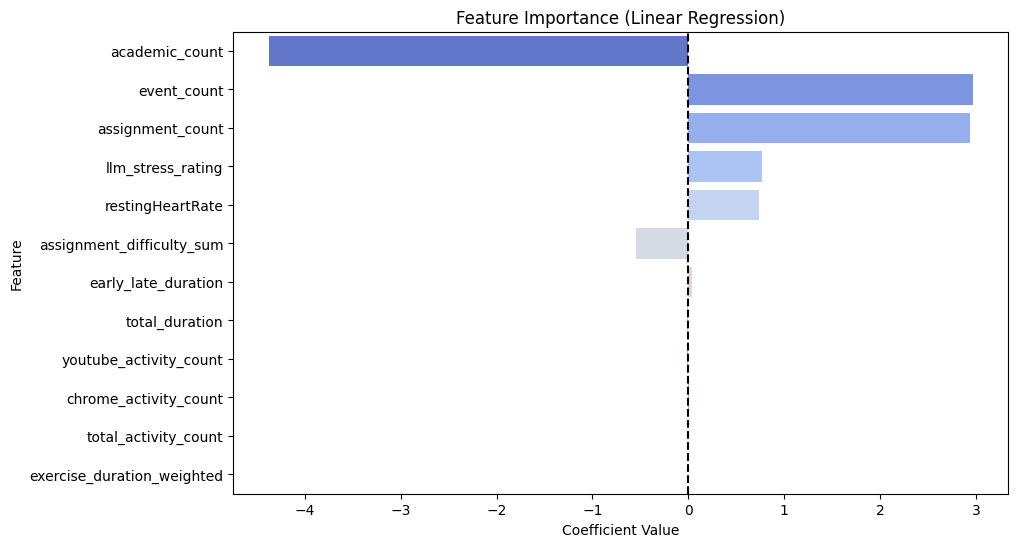

In [30]:
coefficients = final_model.coef_.flatten()  # make sure it's a 1D array
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Coefficient': coefficients
})

feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=feature_importance,
    palette='coolwarm',   # blue to red based on coefficient sign
    orient='h'
)
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')  # vertical line at 0
plt.show()

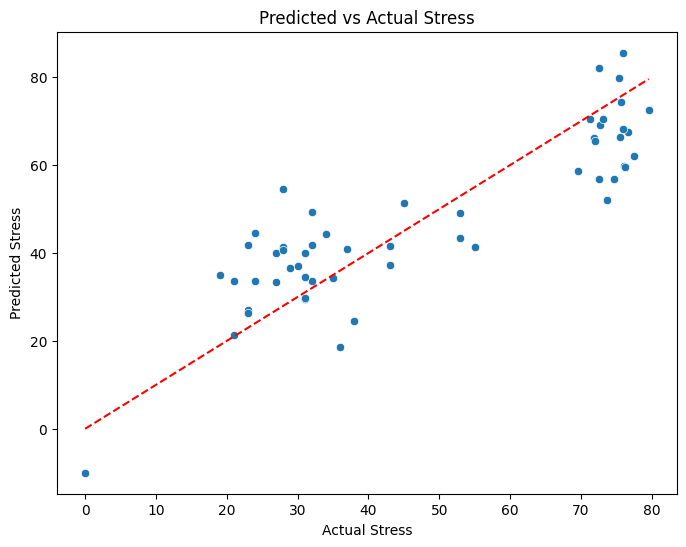

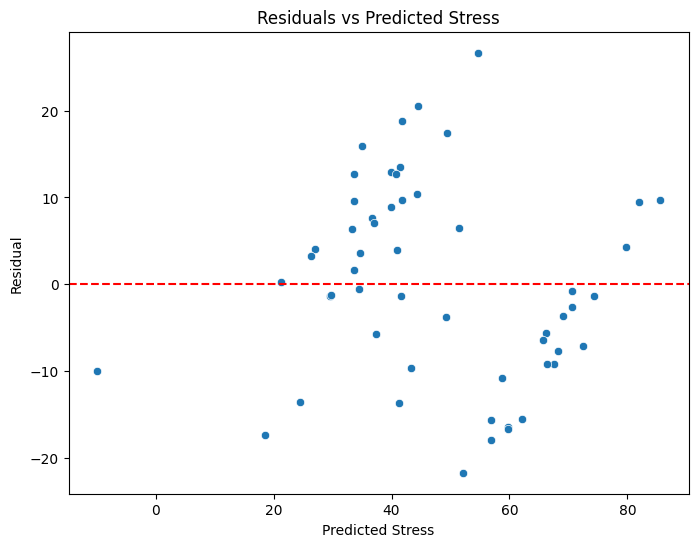

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# y_test = actual stress values
# y_pred = predicted stress values

# 1. Predicted vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Stress')
plt.ylabel('Predicted Stress')
plt.title('Predicted vs Actual Stress')
plt.show()

# 2. Residuals plot
residuals = y_pred - y_test
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Stress')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Stress')
plt.show()

In [15]:
# jackson linear model
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = jackson[['restingHeartRate', 'event_count', 'total_duration',
       'academic_count', 'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating']]
y = jackson['stress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the jackson_model
jackson_model = LinearRegression()

# # Train the jackson_model
jackson_model.fit(X, y)

# # View jackson_model parameters
print(f"jackson_Model: y = {jackson_model.coef_[0]:.2f}x + {jackson_model.intercept_:.2f}")

# # Make a prediction
y_pred = jackson_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

print(X_test.columns)


jackson_Model: y = 0.44x + 9.73
MAE: 9.611765705522725
MSE: 174.51885847735122
RMSE: 13.210558598233128
R² Score: 0.3408855533797057
Index(['restingHeartRate', 'event_count', 'total_duration', 'academic_count',
       'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating'],
      dtype='object')


In [16]:
# joseph model
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = joseph[['restingHeartRate', 'event_count', 'total_duration',
       'academic_count', 'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating']]
y = joseph['stress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the joseph_model
joseph_model = LinearRegression()

# # Train the joseph_model
joseph_model.fit(X, y)

# # View joseph_model parameters
print(f"joseph_Model: y = {joseph_model.coef_[0]:.2f}x + {joseph_model.intercept_:.2f}")

# # Make a prediction
y_pred = joseph_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

joseph_Model: y = 1.13x + 3.18
MAE: 1.513859538825075
MSE: 3.3505473915749007
RMSE: 1.830450051647108
R² Score: 0.6947943867292843
Index(['restingHeartRate', 'event_count', 'total_duration', 'academic_count',
       'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating'],
      dtype='object')


In [18]:
# spencer model

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = spencer[['restingHeartRate', 'event_count', 'total_duration',
       'academic_count', 'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating']]
y = spencer['stress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the spencer_linear_model
spencer_linear_model = LinearRegression()

# # Train the spencer_linear_model
spencer_linear_model.fit(X, y)

# # View spencer_linear_model parameters
print(f"spencer_linear_Model: y = {spencer_linear_model.coef_[0]:.2f}x + {spencer_linear_model.intercept_:.2f}")

# # Make a prediction
y_pred = spencer_linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

spencer_linear_Model: y = 0.77x + -10.30
MAE: 6.136459693401139
MSE: 64.39167127463791
RMSE: 8.024442116099905
R² Score: -0.060368275255190396
Index(['restingHeartRate', 'event_count', 'total_duration', 'academic_count',
       'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating'],
      dtype='object')


In [27]:
# train on spencer and jackson, predict on Joseph
df_jackson = jackson[['restingHeartRate', 'event_count', 'total_duration',
       'academic_count', 'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating']]

df_joseph = joseph[['restingHeartRate', 'event_count', 'total_duration',
       'academic_count', 'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating']]
X_train = pd.concat([df_jackson, df_joseph]) # concat 
y_train = pd.concat([jackson['stress'], joseph['stress']]) # concat stress scores for spencer and jackson

X_test = spencer[['restingHeartRate', 'event_count', 'total_duration',
       'academic_count', 'assignment_count', 'assignment_difficulty_sum',
       'exercise_duration_weighted', 'early_late_duration',
       'total_activity_count', 'youtube_activity_count',
       'chrome_activity_count', 'llm_stress_rating']]

y_test = spencer['stress']

# Create the holdout_spencer_model
holdout_spencer_model = LinearRegression()

# # Train the holdout_spencer_model
holdout_spencer_model.fit(X_train, y_train)

# # View holdout_spencer_model parameters
print(f"holdout_spencer_Model: y = {holdout_spencer_model.coef_[0]:.2f}x + {holdout_spencer_model.intercept_:.2f}")

# # Make a prediction
y_pred = holdout_spencer_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

holdout_spencer_Model: y = 0.71x + 6.42
MAE: 11.350413934765868
MSE: 222.7009452049306
RMSE: 14.923168068641813
R² Score: -0.3020495514187165


In [1]:
%pip install seaborn

NameError: name 'y_true' is not defined

<Figure size 800x600 with 0 Axes>

In [4]:
# # jackson log regression
# X = jackson.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
# y = jackson['llm_stress_rating']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# regular_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# regular_model.fit(X_train, y_train)
# y_pred_regular = regular_model.predict(X_test)
# regular_accuracy = regular_model.score(X_test, y_test)

# coefficients = pd.Series(regular_model.coef_[0], index=X.columns)

# # Sort by absolute value (importance)
# important_features = coefficients.reindex(coefficients.abs().sort_values(ascending=False).index)

# jackson_feature_selection = important_features[important_features.abs() > 0.2].index.tolist()

# print(f"Logistic Regression Accuracy: {regular_accuracy:.4f}")
# jackson_feature_selection

# new_X = jackson[jackson_feature_selection]
# new_y = jackson['llm_stress_rating']

# new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# new_X_train = scaler.fit_transform(new_X_train)
# new_X_test = scaler.transform(new_X_test)
# new_X

# new_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# new_model.fit(new_X_train, new_y_train)
# new_y_pred_regular = new_model.predict(new_X_test)
# regular_accuracnew_y = new_model.score(new_X_test, new_y_test)

# print(f"Logistic Regression Accuracnew_y: {regular_accuracnew_y:.4f}")
# print("The import features for Jackson", jackson_feature_selection)

# # spencer logistic regression
# jackson = jackson.fillna(0)
# spencer = spencer.fillna(0)
# X = spencer.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
# y = spencer['llm_stress_rating']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# regular_model = LogisticRegression()
# regular_model.fit(X_train, y_train)
# y_pred_regular = regular_model.predict(X_test)
# regular_accuracy = regular_model.score(X_test, y_test)

# coefficients = pd.Series(regular_model.coef_[0], index=X.columns)

# # Sort by absolute value (importance)
# important_features = coefficients.reindex(coefficients.abs().sort_values(ascending=False).index)

# spencer_feature_selection = important_features[important_features.abs() > 0.2].index.tolist()

# print(f"Logistic Regression Accuracy: {regular_accuracy:.4f}")


# new_X = spencer[spencer_feature_selection]
# new_y = spencer['llm_stress_rating']

# new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# new_X_train = scaler.fit_transform(new_X_train)
# new_X_test = scaler.transform(new_X_test)
# new_X

# new_model = LogisticRegression()
# new_model.fit(new_X_train, new_y_train)
# new_y_pred_regular = new_model.predict(new_X_test)
# regular_accuracnew_y = new_model.score(new_X_test, new_y_test)

# print(f"Logistic Regression Accuracnew_y: {regular_accuracnew_y:.4f}")
# print("The import features for Spencer", spencer_feature_selection)

# # joseph logistic regression
# X = joseph.drop(["llm_stress_rating", 'person', 'calendarDate'], axis=1)
# y = joseph['llm_stress_rating']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# regular_model = LogisticRegression()
# regular_model.fit(X_train, y_train)
# y_pred_regular = regular_model.predict(X_test)
# regular_accuracy = regular_model.score(X_test, y_test)

# coefficients = pd.Series(regular_model.coef_[0], index=X.columns)

# # Sort by absolute value (importance)
# important_features = coefficients.reindex(coefficients.abs().sort_values(ascending=False).index)

# joseph_feature_selection = important_features[important_features.abs() > 0.2].index.tolist()

# print(f"Logistic Regression Accuracy: {regular_accuracy:.4f}")
# joseph_feature_selection

# new_X = joseph[joseph_feature_selection]
# new_y = joseph['llm_stress_rating']

# new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# new_X_train = scaler.fit_transform(new_X_train)
# new_X_test = scaler.transform(new_X_test)
# new_X

# new_model = LogisticRegression()
# new_model.fit(new_X_train, new_y_train)
# new_y_pred_regular = new_model.predict(new_X_test)
# regular_accuracnew_y = new_model.score(new_X_test, new_y_test)

# print(f"Logistic Regression Accuracnew_y: {regular_accuracnew_y:.4f}")
# print("The import features for Joseph", joseph_feature_selection)

# # use spencer + jackson's data to predict Joseph's stress

# union_features = list(set(jackson_feature_selection) | set(spencer_feature_selection))

# training = pd.concat([jackson, spencer])
# training = training.fillna(0)

# X_train = training[union_features]
# X_test = joseph[union_features]
# y_train = training['llm_stress_rating']
# y_test = joseph['llm_stress_rating']

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# regular_model = LogisticRegression()
# regular_model.fit(X_train, y_train)
# y_pred_regular = regular_model.predict(X_test)
# regular_accuracy = regular_model.score(X_test, y_test)
# print(f"Logistic Regression Accuracy: {regular_accuracy:.4f}")


Logistic Regression Accuracy: 0.4444
Logistic Regression Accuracnew_y: 0.5000
The import features for Jackson ['total_duration', 'chrome_activity_count', 'total_activity_count', 'event_count']


/Users/jacksonmiskill/class/s25/public-health/project3/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/jacksonmiskill/class/s25/public-health/project3/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
